In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import geopandas as gpd
import sklearn
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
import sqlite3
conn = sqlite3.connect("Database_zipcode.db")
conn1 = sqlite3.connect("Database_orders.db")

In [48]:
customers = pd.read_csv('project_data_customer.csv',sep=';')
orderlines = pd.read_csv('project_data_orderlines.csv',sep=';')
products = pd.read_csv('project_data_products.csv',sep=';')
zipcode = pd.read_csv('zipcode.txt',sep='\t',encoding='ansi')
orders = pd.read_csv('project_data_orders.csv',sep=';',encoding='ISO-8859-1')

In [7]:
zipcode.head()

,state,zipcode,ZIPName,County,pctcnty,Fipco,FipCo2,pctState,AltZIPs,NaltZIPs,...,CashRenter,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750
0,36,11937,Springs NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,1417,0.959,60,0.041,1868,0,960,0.650,1289,0.873
1,36,11941,Eastport NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,149,0.914,14,0.086,1210,0,92,0.564,149,0.914
2,36,11940,East Moriches NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,479,0.976,12,0.024,1694,0,206,0.420,479,0.976
3,36,12435,Greenfield Park NY,Ulster NY,1.0,36111.0,NaN,1.0,NaN,0.0,...,0,0.000,19,1.000,0,0,0,0.000,0,0.000
4,36,12063,East Schodack NY,Rensselaer NY,1.0,36083.0,NaN,1.0,NaN,0.0,...,19,1.000,0,0.000,986,0,11,0.579,19,1.000


In [8]:
zipcode.describe()

,state,zipcode,pctcnty,Fipco,FipCo2,pctState,NaltZIPs,Latitude,Longitude,LandSQMI,...,CashRenter,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750
count,32989.000000,32989.000000,32845.000000,32845.000000,8904.000000,32845.000000,32845.000000,32989.000000,32989.000000,32989.000000,...,32989.000000,31141.000000,32989.000000,31141.000000,32989.000000,32989.000000,32989.000000,31141.000000,32989.000000,31141.000000
mean,29.726151,49860.474279,0.961570,29820.591506,30617.031334,0.999694,0.247313,38.917628,-91.114272,86.874265,...,1138.611325,0.826253,66.077693,0.173747,682.007760,252.075025,579.672254,0.375170,729.953136,0.395691
std,15.257236,27446.550091,0.097111,15265.708637,14591.563833,0.008226,0.993525,5.206401,15.078567,253.840653,...,2247.834976,0.212784,92.863856,0.212784,399.265697,434.231283,1202.792530,0.205041,1670.801772,0.300791
min,1.000000,1001.000000,0.273000,1001.000000,1001.000000,0.523000,0.000000,19.091222,-176.638613,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,27107.000000,0.995000,18057.000000,19059.000000,1.000000,0.000000,35.459018,-97.276708,9.080000,...,35.000000,0.771000,8.000000,0.033000,510.000000,0.000000,12.000000,0.253000,7.000000,0.138000
50%,30.000000,49839.000000,1.000000,30003.000000,29160.000000,1.000000,0.000000,39.530029,-88.258393,36.000000,...,172.000000,0.903000,30.000000,0.097000,665.000000,0.000000,74.000000,0.395000,60.000000,0.346000
75%,42.000000,72176.000000,1.000000,42049.000000,42071.500000,1.000000,0.000000,42.130855,-80.308885,88.970000,...,1128.000000,0.967000,89.000000,0.229000,877.000000,569.000000,538.000000,0.500000,577.000000,0.639000
max,56.000000,99929.000000,1.000000,56045.000000,56045.000000,1.000000,51.000000,71.301803,-67.002848,13430.990000,...,33513.000000,1.000000,1833.000000,1.000000,2001.000000,3794.000000,17874.000000,1.000000,27471.000000,1.000000


OGÓLNA ANALIZA KLIENTÓW

Wyświetlimy średni wiek mieszkańców dla każdego stanu

In [57]:
MedianAge_perState = zipcode[['state','Stab','MedianAge','Latitude','Longitude']]
MedianAge_perState_groupby = MedianAge_perState.groupby('Stab').mean()
MedianAge_perState_groupby

,state,MedianAge,Latitude,Longitude
Stab,,,,
AK,2,35.075641,61.622001,-153.359394
AL,1,40.268189,32.883226,-86.818078
AR,5,42.249915,35.135067,-92.378020
AZ,4,40.658897,33.700972,-111.578707
CA,6,39.456474,36.426736,-119.925521
CO,8,41.576953,39.232829,-105.343466
CT,9,41.819784,41.574901,-72.766146
DC,11,33.416667,38.902337,-77.026245
DE,10,41.207812,39.208644,-75.513982


Zgodnie z danymi raportu na stronie https://www.populationof.net/ średni wiek populacji w Stanach Zjednoczonych w roku 2020 wynosił 39.4 lat. Sprawdźmy ile stanów ma średni wiek mniejszy od przeciętnego.

Źródło: https://www.populationof.net/pl/united-states-of-america/ 

In [58]:
for index, row in MedianAge_perState_groupby.iterrows():
    if row['MedianAge'] < 39.4:  
        MedianAge_perState_groupby.loc[index,'Size'] = 'Small'
        print(index,MedianAge_perState_groupby.loc[index,'Size'])

AK Small
DC Small
GA Small
HI Small
IN Small
LA Small
MS Small
TX Small
UT Small


Wyświetlamy mape USA i zaznaczamy na mapie stany z wiekiem średnim, niższym od przeciętnego. 

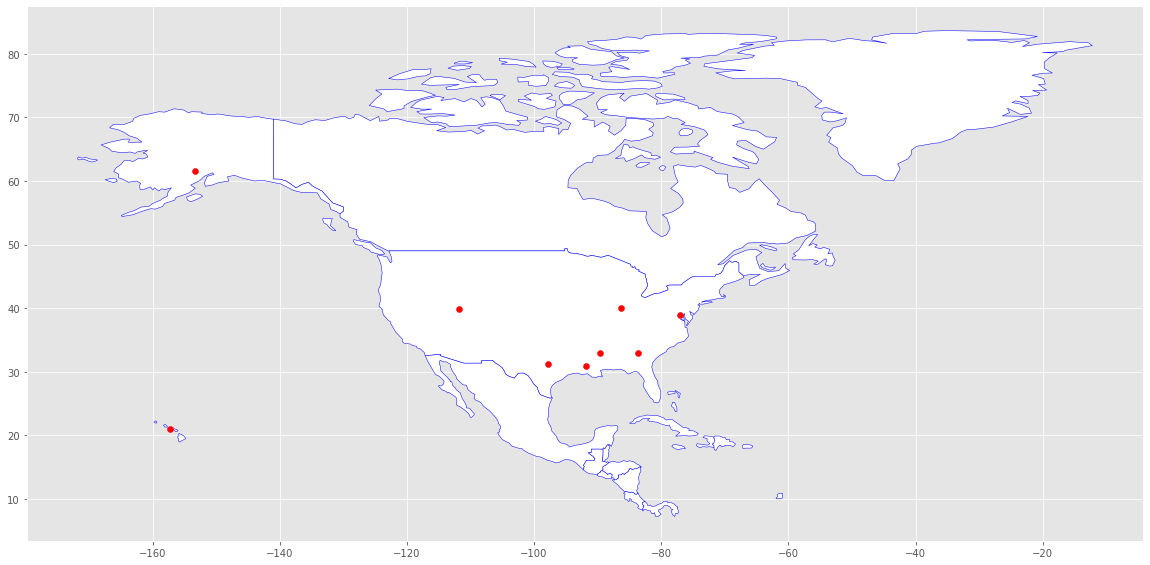

In [59]:
def render_map(dataframe):

    gdf = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(
        dataframe.Longitude, dataframe.Latitude))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    ax = world[world.continent == 'North America'].plot(
        color='white', edgecolor='blue', figsize=(20, 20))
    gdf.plot(ax=ax, color='red')
    plt.show()
    
render_map(MedianAge_perState_groupby.loc[MedianAge_perState_groupby['MedianAge'] < 39.4])

[0.0651442599779895, 0.06570562306629898, 0.06679233116751175, 0.07093771920613147, 0.07043141518405277, 0.13321777550315325, 0.1333626791902082, 0.14442548191943888, 0.06366449743111445, 0.05475037637902136, 0.07120650579220568, 0.04253034659530149, 0.0178309885875722]


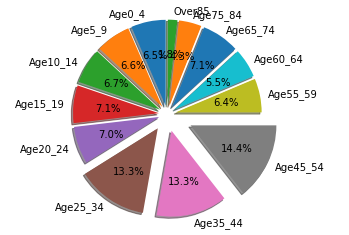

In [160]:
a = np.array(['Age0_4', 'Age5_9', 'Age10_14', 'Age15_19', 'Age20_24', 'Age25_34', 'Age35_44', 'Age45_54', 'Age55_59', 'Age60_64', 'Age65_74', 'Age75_84', 'Over85'])
y=[]
for i in a: 
    b = zipcode[[i]].to_numpy()
    c = zipcode[["TotPop"]].to_numpy()
    y.append(np.divide(sum(b),sum(c))[0])
print(y)

labels = 'Age0_4', 'Age5_9', 'Age10_14', 'Age15_19', 'Age20_24', 'Age25_34', 'Age35_44', 'Age45_54', 'Age55_59', 'Age60_64', 'Age65_74', 'Age75_84', 'Over85'

sizes = y
explode = (0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.1,0.1,0.1,0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [47]:
#zipcode.to_sql('zipcode', conn)
#orders.to_sql('orders', conn1)
#pd.read_sql("select state, totalprice  from orders group by state order by totalprice", con=conn1)
orders.sort_values(by='totalprice', ascending = False).head(10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
149792,1244054,146401,2141,2015-02-08 00:00,BOULDER,CO,80302,VI,9848.96,20,8
180903,1508125,184224,2141,2016-03-01 00:00,INDEPENDANCE,OH,44131,AE,9436.59,55,25
161864,1360162,18818,2189,2015-08-09 00:00,CLIFFSIDE PARK,NJ,7010,MC,9137.09,45,753
156604,1310162,165771,2236,2015-05-16 00:00,DEL MAR,CA,92014,AE,8830.00,38,13
144992,1206181,140377,2141,2014-11-19 00:00,SAUSALITO,CA,94965,AE,6920.32,32,17
110127,1111842,128435,2173,2014-05-21 00:00,FRANKLIN,MA,2038,VI,6920.00,12,12
59476,1061106,72141,2237,2012-12-12 00:00,BIRMINGHAM,AL,35203,DB,6780.00,1,400
185598,1568128,186835,2236,2016-05-13 00:00,NEW YORK,NY,10175,AE,6685.00,19,12
150715,1254020,145718,2236,2015-01-22 00:00,SCRANTON,PA,18510,AE,6625.00,28,13
28687,1054380,88800,2141,2012-11-12 00:00,NEW YORK,NY,10123,AE,6606.00,15,15


Skorzystamy z histogramu, żeby zobaczyć przedział stanów w stosunku do średniego wieku.
Zrobimy to na dwa sposoby. 

Text(0, 0.5, 'State count')

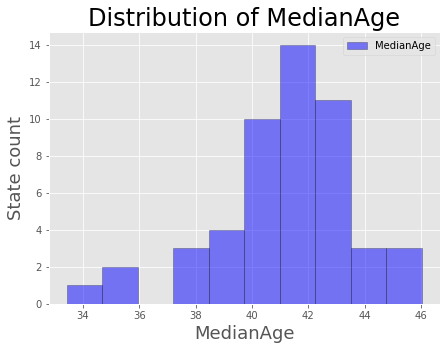

In [49]:
MedianAge_perState_groupby[MedianAge_perState_groupby['state'] > 0].MedianAge.plot(
    kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(7, 5))

plt.legend(labels=['MedianAge'])
plt.title('Distribution of MedianAge', size=24)
plt.xlabel('MedianAge', size=18)
plt.ylabel('State count', size=18)

Text(0, 0.5, 'State count')

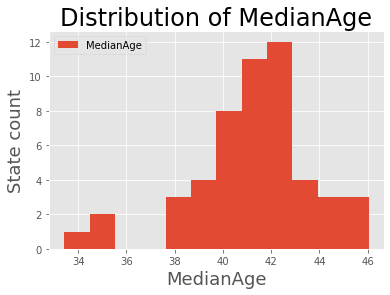

In [51]:
MedianAge_perState_groupby.hist('MedianAge',bins=12)
plt.legend(labels=['MedianAge'])
plt.title('Distribution of MedianAge', size=24)
plt.xlabel('MedianAge', size=18)
plt.ylabel('State count', size=18)

Przejrzyjmy się średniej wysokości zarobków w róznych stanach

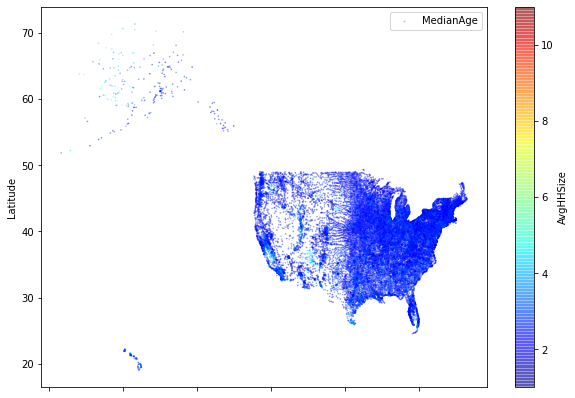

In [9]:
zipcode.plot(kind='scatter', x='Longitude', y='Latitude', alpha =0.4,
            s=zipcode['MedianAge']/100, label = 'MedianAge', figsize =(10,7),
            c='AvgHHSize',cmap=plt.get_cmap('jet'),colorbar=True,
            )
plt.legend()

array([[<AxesSubplot:xlabel='MedianAge', ylabel='MedianAge'>,
        <AxesSubplot:xlabel='AvgHHSize', ylabel='MedianAge'>],
       [<AxesSubplot:xlabel='MedianAge', ylabel='AvgHHSize'>,
        <AxesSubplot:xlabel='AvgHHSize', ylabel='AvgHHSize'>]],
      dtype=object)

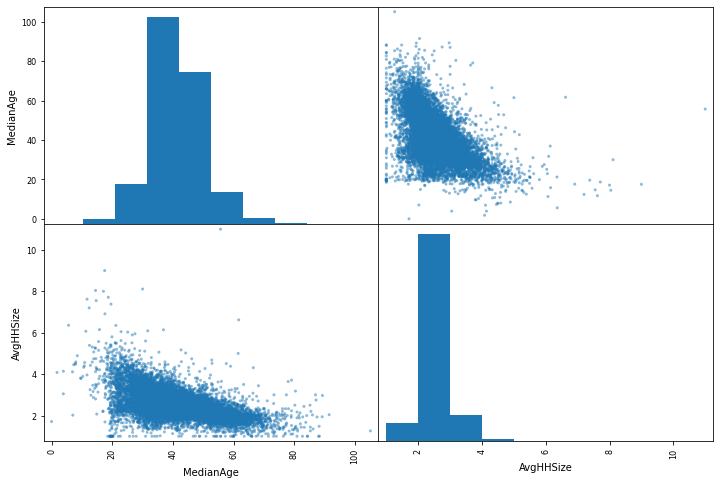

In [26]:
attributes = ['MedianAge', 'AvgHHSize']
scatter_matrix(zipcode[attributes], figsize=(12,8))

Przeanalizujmy współzależność założenia rodziny a obecności dziecka za pomocą regresji liniowej. 

In [18]:
def get_list(dataframe, prop): return dataframe[prop].values

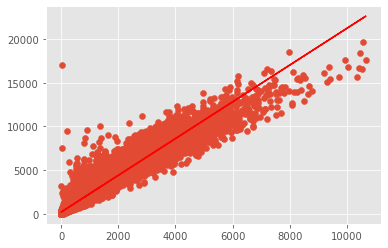

In [91]:
def linear_regression(x, y):
    X = get_list(zipcode, x).reshape(-1, 1)
    Y = get_list(zipcode, y).reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

linear_regression(y='MarriedCouples', x='CouplesWithKids',)

Współzależność między wysokością zarobków a płcią

In [94]:
MedianAge_perState = zipcode[['MedianEarnings','Males','Females']]
MedianAge_perState_groupby = MedianAge_perState.groupby('MedianEarnings').mean()
MedianAge_perState_groupby

,Males,Females
MedianEarnings,,
0,14.964549,15.902511
2499,593.228571,709.835714
2505,510.000000,833.000000
2547,226.000000,573.000000
2555,6.000000,1044.000000
...,...,...
208409,80.000000,77.000000
212647,64.000000,58.000000
217333,13.000000,15.000000


Text(0, 0.5, 'MedianEarnings')

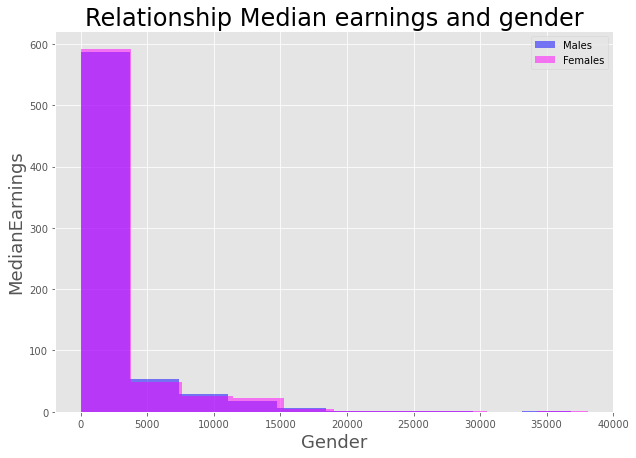

In [106]:
ax1 = zipcode[zipcode['state'] == 20].plot(
    kind='hist', x='MedianEarnings', y='Males', color='blue', alpha=0.5, figsize=(10, 7))
zipcode[zipcode['state'] == 20].plot(kind='hist', x='MedianEarnings',
                                     y='Females', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship Median earnings and gender', size=24)
plt.xlabel('Gender', size=18)
plt.ylabel('MedianEarnings', size=18)

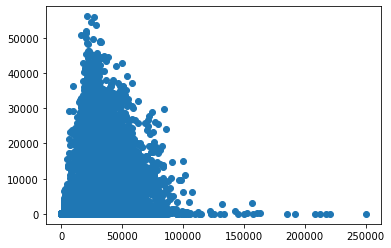

In [6]:
x = zipcode['MedianEarnings']
y = zipcode['Males']
plt.scatter(x,y)